In [117]:
import pandas as pd
from importlib import reload

## Configs

In [118]:
BATCH_SIZE = 32
LEARNING_RATE = 5e-4

## Preprocessing
Negative Sampling the dataset

In [178]:
from src.Preprocess.Preprocessor import Preprocessor
Preprocessor.create_negative_sampled_dataset(input_address="data/SA_history_clicks_of_98.csv", 
                                               output_address="data/data2.pkl", 
                                               neg_to_pos_ratio=2)

Reading input file data/SA_history_clicks_of_98.csv



File created at data/data2.pkl


,queryText,packageName,similar
0,توشمال,com.example.masood.yocheneapp,1
1,rush,com.ketchapp.rush,1
2,شب چله,yalda.ir.kr.si.ma.usn,1
3,عشق,com.roman.jadogareeshgh,1
4,کلابی,ir.mmdali.cluby,1
...,...,...,...
32844571,فرار از جنگل,com.morabaerangi.morabirangii,-1
32844572,روبینو,eu.softwareworkshop.brokenscreen,-1
32844573,روبینو,com.rovio.retry,-1
32844574,کاهتهتخنتالفل 644 علیر,mhn.king,-1


## DatasetHandler
Preparing dataset for training

In [181]:
from src.Trainer.DatasetHandler import DatasetHandler

dataset_handler = DatasetHandler("data/data2.pkl", frac=0.001)

Loading tokenizer...
Reading input file...



Shuffling dataset...
Tokenizing ads...


C:\Users\Mohsen\Anaconda3\lib\site-packages\tqdm\std.py:654: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



Creating dataset...
Tokenizing queries...



Done


In [182]:
import pandas as pd
print(dataset_handler.get_dataset())
dataset_handler.df
pd.DataFrame(dataset_handler.get_dataset()["train"][:1000])

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'attention_mask', 'input_ids', 'packageName', 'package_ids', 'queryText', 'similar', 'token_type_ids'],
        num_rows: 27918
    })
    test: Dataset({
        features: ['__index_level_0__', 'attention_mask', 'input_ids', 'packageName', 'package_ids', 'queryText', 'similar', 'token_type_ids'],
        num_rows: 4927
    })
})


,__index_level_0__,attention_mask,input_ids,packageName,package_ids,queryText,similar,token_type_ids
0,363,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 2464, 17122, 6478, 4, 0, 0, 0, 0, 0, 0, 0,...",com.batmanforever.sard,[51923],ساخت تیزر تبلیغاتی,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,16327,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 90677, 46149, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0...",ir.turk.book,[7891],kantr,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,17556,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2, 10582, 1198, 1, 37898, 1177, 1198, 1, 309,...",com.ansangha.drjb,[43406],هتخ 7 هههخ 7822 ث 2 ثثث,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,13863,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]","[2, 6877, 11040, 5076, 4511, 1, 4, 0, 0, 0, 0,...",com.refahcart_69210,[19898],رمز تقلب جی تی 4,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,29173,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 15990, 7428, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",ir.hnfadak.amaliyathayedefaemoghadasfarhangsar...,[51678],بفرمایید شام,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...
995,11910,"[1, 1, 1, 1, 0, 0, 0, 0, 0]","[2, 21283, 1188, 4, 0, 0, 0, 0, 0]",com.UCMobile.intl,[28905],upn,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
996,28072,"[1, 1, 1, 0, 0, 0, 0, 0, 0]","[2, 11659, 4, 0, 0, 0, 0, 0, 0]",com.kanter.gameapp,[17165],دیتا,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
997,3898,"[1, 1, 1, 1, 0, 0, 0, 0, 0]","[2, 15089, 31912, 4, 0, 0, 0, 0, 0]",iran.hiandroid.axbefilm,[39026],کیبوردجدید,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
998,2418,"[1, 1, 1, 0, 0, 0, 0, 0, 0]","[2, 2889, 4, 0, 0, 0, 0, 0, 0]",com.mohsen.app_locker,[73949],امنیت,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"


## Training

Train on 27918 samples, test on 4927 samples
----------------



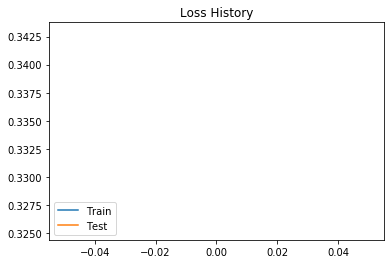

----------------



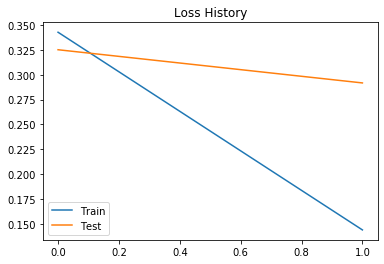

----------------



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




Traceback (most recent call last):
  File "C:\Users\Mohsen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-215-0114d13878a0>", line 9, in <module>
    trainer.train(epochs=3)
  File "F:\Programming\DNN\Tapsell\Task\sponsored-search\src\Trainer\Trainer.py", line 54, in train
    running_loss += loss.item()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mohsen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mohsen\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _

KeyboardInterrupt: 

In [215]:
import src.Trainer.RepresentationBuilder
reload(src.Trainer.RepresentationBuilder)
import src.Trainer.QueryAdCoordinator
reload(src.Trainer.QueryAdCoordinator)
import src.Trainer.Trainer
reload(src.Trainer.Trainer)

trainer = src.Trainer.Trainer.Trainer(embedding_dim=50, dataset_handler=dataset_handler, learning_rate=LEARNING_RATE)
trainer.train(epochs=3)

In [216]:
trainer.query_ad_coordinator

QueryAdCoordinator(
  (query_representation_builder): RepresentationBuilder(
    (embedding): Embedding(100000, 50)
    (pooling_module): SpanPoolingAvg()
  )
  (ad_representation_builder): RepresentationBuilder(
    (embedding): Embedding(93592, 50)
    (pooling_module): SpanPoolingAvg()
  )
  (loss): CosineEmbeddingLoss()
)

In [217]:
trainer.save_all_representations(ad_reprs_address="representations/ad_reprs.pt",
                                    vocab_reprs_address="representations/vocab_reprs.pt",
                                    id_to_package_address="representations/ad_id_to_package.pkl")


torch.Size([93592, 50])
Saved ad representations at representations/ad_reprs.pt



100000
Saved vocab representations at representations/vocab_reprs.pt


## Prediction

In [218]:
import src.Predictor.Predictor
reload(src.Predictor.Predictor)

predictor = src.Predictor.Predictor.Predictor(ad_reprs_address="representations/ad_reprs.pt",
                                              vocab_reprs_address="representations/vocab_reprs.pt",
                                              id_to_package_address="representations/ad_id_to_package.pkl")

Loading tokenizer...
Loading ad representations...
Loading ad id to package...
Loading vocab representations...


In [223]:
predictor.predict_from_query("امنیت", full_results=True)

dist: 0.90257 com.mohsen.app_locker
dist: 0.72858 com.cleanmaster.mguard
dist: 0.71382 ir.part.app.signal
dist: 0.71314 com.consoleco.console
dist: 0.71146 com.tinylabproductions.automatronstanks.cafebazaar
dist: 0.70649 se.hellothere.skilltwins
dist: 0.70466 Ahmad.toystory
dist: 0.70442 mhn.oscar
dist: 0.70391 ir.acedev.typegraphi
dist: 0.70384 com.estmob.android.sendanywhere


(['com.mohsen.app_locker',
  'com.cleanmaster.mguard',
  'ir.part.app.signal',
  'com.consoleco.console',
  'com.tinylabproductions.automatronstanks.cafebazaar',
  'se.hellothere.skilltwins',
  'Ahmad.toystory',
  'mhn.oscar',
  'ir.acedev.typegraphi',
  'com.estmob.android.sendanywhere'],
 tensor([0.9026, 0.7286, 0.7138, 0.7131, 0.7115, 0.7065, 0.7047, 0.7044, 0.7039,
         0.7038], grad_fn=<TopkBackward>),
 tensor([73949, 10921,  7599,  7941,  4499, 65113, 47259, 35440, 34310, 12911]),
 tensor([[ 0.4357, -0.6842,  0.5720,  1.4881, -0.3556, -0.6791, -1.4499, -0.7089,
           0.3685,  0.3955,  0.8773, -0.1606,  0.4810, -0.8106,  0.7744, -0.1382,
          -0.2627,  0.3659,  1.2855, -1.0304,  1.1394,  0.6231, -0.1610,  0.6963,
           0.6669,  0.2208,  0.0844,  0.6533, -1.0687,  0.8213, -0.7562, -0.3963,
          -1.5966, -1.3701, -0.3985, -0.2763, -0.4646, -1.1658, -0.6821,  0.6541,
          -0.5540, -0.1343,  0.9037, -1.6488,  1.4031,  0.7478,  0.0320,  0.1033,
           0

### TSNE

dist: 0.82834 com.ea.game.pvzfree_row
dist: 0.82634 net.telewebion
dist: 0.81976 mhn.zambi
dist: 0.79956 ir.part.app.signal
dist: 0.78028 com.sega.sonicdash
dist: 0.76609 com.cleanmaster.security_x86
dist: 0.75664 com.feelingtouch.zf3d.farsi
dist: 0.74688 air.com.FDGEntertainment.BloodyHarry
dist: 0.74434 net.mobigame.zombietsunami
dist: 0.74197 com.lenovo.anyshare.gps
dist: 0.74088 com.imangi.templerun
dist: 0.73953 ir.zback.lock
dist: 0.73698 ir.basicapp.hcilk
dist: 0.73377 com.ansangha.drjb
dist: 0.73057 com.ovilex.bussimulator2015
dist: 0.72648 com.agah.asatrader
dist: 0.72482 com.hafizco.mobilebankansar
dist: 0.72250 com.bau.asphaltparking
dist: 0.71841 mobi.MultiCraft
dist: 0.71767 com.tooskagroup.brokenscreen


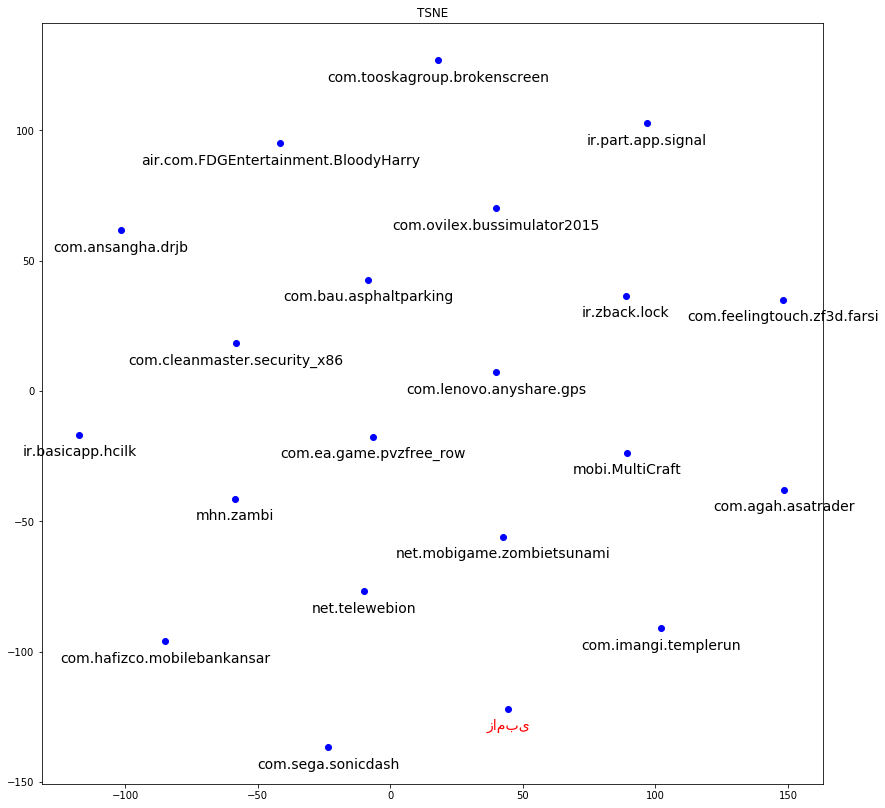

In [220]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

top_k = 20
query = "زامبی"

packages, knn_values, knn_ids, query_repr = predictor.predict_from_query(query, full_results=True, k=top_k)

reprs = torch.cat((predictor.ad_reprs[knn_ids], query_repr), dim=0).detach().numpy()

id_to_name = []
for idx in knn_ids:
    id_to_name.append(predictor.ad_id_to_package[int(idx)])
id_to_name.append(query)

tsne = TSNE(metric='cosine', random_state=123)
embed_tsne = tsne.fit_transform(reprs)
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(top_k + 1):
    plt.scatter(*embed_tsne[idx, :], color='blue')
    plt.title("TSNE")
    if idx == top_k:
        color = "red"
    else:
        color = "black"
    plt.annotate(id_to_name[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), 
                 alpha=1, color=color, fontsize=14, xytext=(0, -10), va='top', ha='center', textcoords='offset points')
